In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import functools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

%matplotlib inline

# Algoritmi genetici

Calculul maximului functiei $f: [3, 10] \times [4, 8] \rightarrow (0, \infty)$, unde functia este:

$$f(x, y) = sin\left(\pi \cdot 10 \cdot x + \frac{10}{1 + y^2}\right) + ln(x^2 + y^2)$$

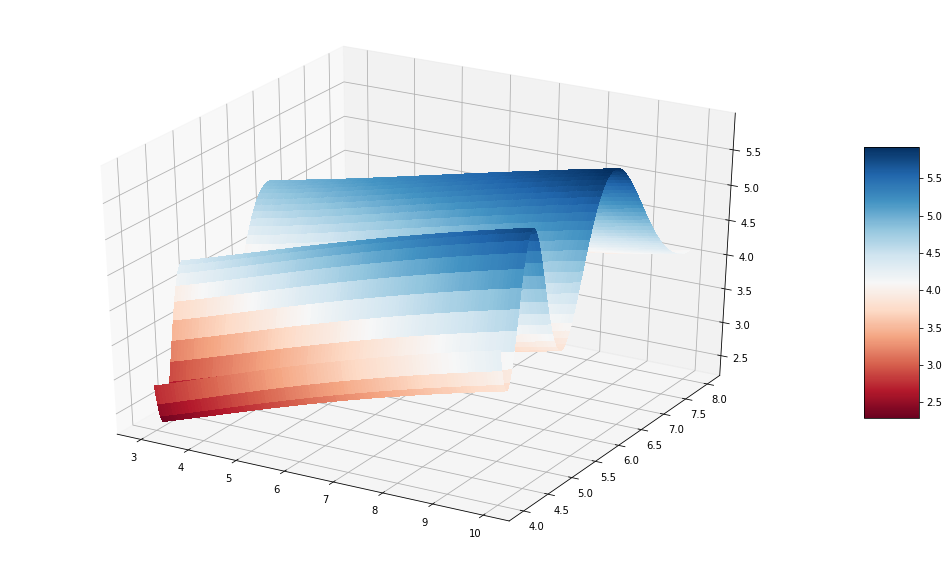

In [2]:
def f(x, y):
    return np.sin(np.pi * 10 * 10/(1 + y**2)) + np.log(x**2 + y**2)

sampling = 100

x = np.linspace(3, 10, num=sampling)
y = np.linspace(4, 8, num=sampling)
X, Y = np.meshgrid(x, y)
Z = np.zeros((sampling, sampling))

for i in range(sampling):
    for j in range(sampling):
        Z[i, j] = f(X[i, j], Y[i, j])
        
fig = plt.figure()
fig.set_size_inches(18, 10)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)

#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [3]:
k = 10
# [3, 10], [4, 8]

def x_c(v, a, b, k):
    return a + v * (b-a) / ((1 << k) - 1)

assert(x_c(0, 3, 10, k) == 3)
assert(x_c((1 << k) - 1, 3, 10, k) == 10)
assert(x_c(0, 4, 8, k) == 4)
assert(x_c((1 << k) - 1, 4, 8, k) == 8)

In [4]:
# crearea populatiei initiale
population = [(np.random.randint(0, (1 << k)), np.random.randint(0, (1 << k))) for i in range(50)]
yi = [f(x, y) for x, y in population]
pi = yi / sum(yi)
qi = np.r_[np.array([0]), np.cumsum(pi)]


# copierea in noua populatie
n = len(population)
[population[i] for i in range(n)]

rand = [np.random.random() for i in range(n)] 
selectedi = [i for r in rand for i in range(n) if qi[i] < r and r <= qi[i+1]]
selected = [population[i] for i in selectedi]
selected

[(110, 419),
 (35, 755),
 (674, 566),
 (642, 297),
 (110, 419),
 (476, 722),
 (153, 307),
 (110, 419),
 (476, 722),
 (930, 390),
 (454, 98),
 (642, 604),
 (391, 434),
 (1017, 628),
 (874, 823),
 (35, 755),
 (874, 823),
 (625, 421),
 (60, 270),
 (60, 270),
 (908, 976),
 (1017, 628),
 (576, 183),
 (847, 489),
 (454, 98),
 (220, 520),
 (643, 494),
 (809, 533),
 (437, 958),
 (874, 823),
 (176, 927),
 (826, 432),
 (324, 850),
 (220, 520),
 (908, 976),
 (224, 316),
 (935, 856),
 (814, 522),
 (1004, 304),
 (904, 427),
 (809, 533),
 (814, 522),
 (583, 156),
 (643, 494),
 (1017, 628),
 (220, 520),
 (826, 432),
 (110, 419),
 (814, 522),
 (847, 489)]